# PISA 2012 Data Exploration
## by Salma Samy

## Preliminary Wrangling

> PISA is a survey of students' skills and knowledge as they
approach the end of compulsory education. It is not a
conventional school test. Rather than examining how well
students have learned the school curriculum, it looks at how
well prepared they are for life beyond school.
Around 510,000 students in 65 economies took part in the
PISA 2012 assessment of reading, mathematics and science
representing about 28 million 15-year-olds globally. Of those
economies, 44 took part in an assessment of creative problem
solving and 18 in an assessment of financial literacy.  
Here we examine only 100,000 students and some of selected indicators

In [310]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [311]:
#Load Dataset with only 100,000 records and specific columns
org_colnames=['CNT','SCHOOLID','STIDSTD','ST04Q01','ST86Q04','IC08Q06','IC08Q08','W_FSTUWT','ST89Q03',"TIMEINT","OUTHOURS"]
pisa=pd.read_csv("pisa2012.csv",nrows=100000,usecols=org_colnames,low_memory=False)

In [312]:
#rename columns
pisa.rename(columns={'CNT': 'country', 'SCHOOLID': 'school_id','STIDSTD':'std_id','ST04Q01':'gender','ST86Q04':'helpful_teachers',\
                   'IC08Q06':'internet_fun','IC08Q08':'internet_study','W_FSTUWT':'pisa_score','ST89Q03':'school_prep_college','TIMEINT':"time_computer_use",'OUTHOURS':"study_time" },inplace=True)

In [313]:
# convert helpful_teachers, school_prep_college,internet_fun and internet_study into ordered categorical types
ordinal_var_dict = {'helpful_teachers': ['Strongly agree','Agree','Disagree','Strongly disagree'],
                    'school_prep_college': ['Strongly agree','Agree','Disagree','Strongly disagree'],
                    'internet_fun': ['Never or hardly ever', 'Once or twice a month', 'Once or twice a week', 'Almost every day', 'Every day'],
                    'internet_study': ['Never or hardly ever', 'Once or twice a month', 'Once or twice a week', 'Almost every day', 'Every day']
                   }

for var in ordinal_var_dict:
    ordered_var = pd.api.types.CategoricalDtype(ordered = True,
                                                categories = ordinal_var_dict[var])
    pisa[var] = pisa[var].astype(ordered_var)

In [314]:
# high-level overview of data shape and composition
print(pisa.shape)
print(pisa.dtypes)
print(pisa.tail(10))

(100000, 11)
country                  object
school_id                 int64
std_id                    int64
gender                   object
helpful_teachers       category
school_prep_college    category
internet_fun           category
internet_study         category
study_time              float64
time_computer_use       float64
pisa_score              float64
dtype: object
           country  school_id  std_id  gender helpful_teachers  \
99990  Switzerland        155    3977  Female         Disagree   
99991  Switzerland        155    3978  Female            Agree   
99992  Switzerland        155    3979  Female            Agree   
99993  Switzerland        155    3980    Male            Agree   
99994  Switzerland        155    3981    Male            Agree   
99995  Switzerland        155    3982  Female            Agree   
99996  Switzerland        156    3983  Female   Strongly agree   
99997  Switzerland        156    3984  Female            Agree   
99998  Switzerland        1

In [315]:
print(pisa.pisa_score.describe())
print(pisa.time_computer_use.describe())

count    100000.000000
mean         38.710557
std          71.750987
min           1.000000
25%           5.382400
50%          14.173200
75%          30.471200
max        1188.783500
Name: pisa_score, dtype: float64
count    30324.000000
mean        56.950501
std         42.273089
min          0.000000
25%         26.000000
50%         45.000000
75%         77.000000
max        206.000000
Name: time_computer_use, dtype: float64


In [316]:
pisa.country.value_counts()

Canada                  21544
Brazil                  19204
Australia               14481
United Arab Emirates    11500
Belgium                  8597
Argentina                5908
Bulgaria                 5282
Austria                  4755
Albania                  4743
Switzerland              3986
Name: country, dtype: int64

In [317]:
pisa.school_id.value_counts()

145    451
94     404
98     392
82     390
129    351
      ... 
870     14
871     13
841      8
877      8
846      6
Name: school_id, Length: 885, dtype: int64

### The structure of  dataset

There are 100,000 students in the dataset with 11 columns

<b>country</b>: country of student  
<b>school_id</b>: school id  
<b>std_id</b>: student id  
<b>gender</b>: student gender  
<b>helpful_teachers</b>: teachers help student, student response : ['Strongly agree','Agree','Disagree','Strongly disagree']  
<b>school_prep_college</b>: school prepares for college, student response : ['Strongly agree','Agree','Disagree','Strongly disagree']  
<b>internet_study</b>: use internet for study, student response : ['Never or hardly ever', 'Once or twice a month', 'Once or twice a week', 'Almost every day', 'Every day']  
<b>internet_fun</b>: use internet for fun, student response :['Never or hardly ever', 'Once or twice a month', 'Once or twice a week', 'Almost every day', 'Every day']
<b>time_computer_use</b>: time of using a computer per day in mins    
<b>study_time</b>: study time in mins  
<b>pisa_score</b>: pisa performance final score in various fields i.e. (Maths,science,Reading,...)

### What is/are the main feature(s) of interest in your dataset?

> I'm interested in figuring out what indicators that affects most the student performance score 

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> I think being in specific country or gender may affect student performance as well as helpful teachers 
>aslo student study or having fun/study time on the internet may have a big effect on his score

## Univariate Exploration

>Let's see the pisa score distribution

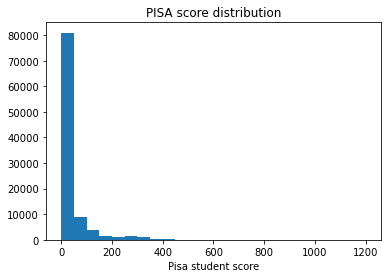

In [343]:
binsize =50
bins = np.arange(0, pisa['pisa_score'].max()+binsize, binsize)
plt.hist(data = pisa, x = 'pisa_score', bins = bins)
plt.xlabel('Pisa student score')
plt.title("PISA score distribution")
plt.show()

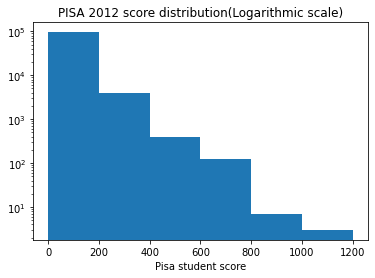

In [344]:
#taking log scale for y axis
binsize =200
bins = np.arange(0, pisa['pisa_score'].max()+binsize, binsize)
plt.hist(data = pisa, x = 'pisa_score', bins = bins)
plt.xlabel('Pisa student score')
plt.yscale("log")
plt.title("PISA 2012 score distribution(Logarithmic scale)")
plt.show()


>After taking log scale of y axis, we see that pisa score data is right skewed which means that more than 50% of students scores are below mean score

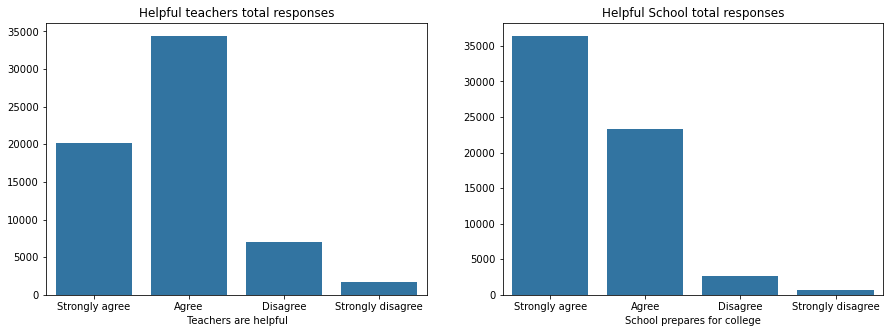

In [346]:
#plot helpful teatchers distribution and school prepare for college
ylabel=""
fig, ax = plt.subplots(ncols=2, figsize = [15,5])
colors=sb.color_palette()[0]
sb.countplot(data=pisa,x=pisa.helpful_teachers,color=colors,ax=ax[0]);
sb.countplot(data=pisa,x=pisa.school_prep_college,color=colors,ax=ax[1]);

ax[0].set(xlabel=" Teachers are helpful",ylabel=ylabel,title="Helpful teachers total responses");
ax[1].set(xlabel="School prepares for college",ylabel=ylabel,title="Helpful School total responses");

>most of students are responding to helpful teatchers as they agree and strognly agree while few responses that disagree and strogly disaree
>but for school prepares for coolege questionnaire the most responds go with strongly agree reply

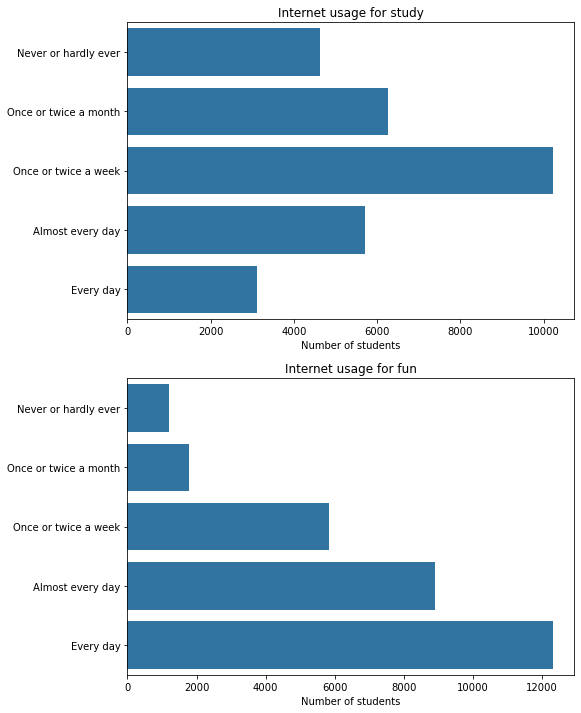

In [321]:
#plot study with computer and have fun with computer
xlabel="Number of students"
ylabel=""
fig, ax = plt.subplots(nrows=2, figsize = [8,12])

sb.countplot(data=pisa,y=pisa.internet_study,color=colors, ax = ax[0]).set_title("Internet usage for study");

sb.countplot(data=pisa,y=pisa.internet_fun,color=colors, ax = ax[1]).set_title("Internet usage for fun");

ax[0].set(xlabel=xlabel,ylabel=ylabel);
ax[1].set(xlabel=xlabel,ylabel=ylabel);


>First graph shows that distribution of students that use internet for study is normally distributed  
>second one shows that distribution of students that use internet for fun is left skewed which means that that major of students use internet for fun evey day

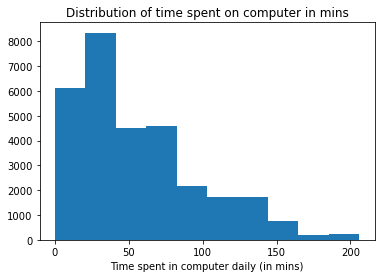

In [348]:
#plot computer time used per day in mins
plt.hist(data = pisa, x = 'time_computer_use');
plt.xlabel("Time spent in computer daily (in mins)");
plt.title("Distribution of time spent on computer in mins");

>graph show right skewed data of time spent in using computer

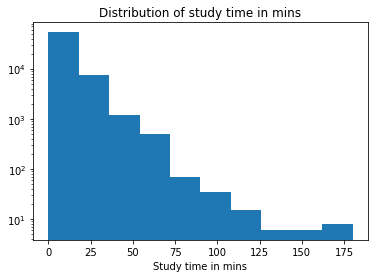

In [349]:
plt.hist(data=pisa,x="study_time");
plt.yscale("log")
plt.xlabel("Study time in mins");
plt.title("Distribution of study time in mins");

>study time is right skewed

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> -yes I have made a scale transformation for count of PISA score to have a closer view of the PISA score distrubution  
> -PISA score are very right skewed and more than 75% of scores are below the mean  
> -Study time and computer time are also right skewed  
> -Most responses agree that teachers are helpful and school prepares for college  
> -Using internet for study is normally distributed but using internet for fun is left skewed as most of students use it eveyday
### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

>  I've sorted categorical data of using internet in study and computer , also I've sorted categorical data of survying asnwers of helpful teachers and school prepare for college, to help me in visualizaing graphs and analyze data

## Bivariate Exploration



#### First let's find indicators that affects pisa score

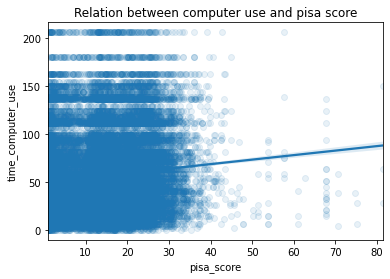

In [351]:
#relation between computer usage time and pisa score
sb.regplot(data=pisa,y='time_computer_use',x='pisa_score', scatter_kws={'alpha':.1});
plt.title("Relation between computer use and pisa score");

>Data here shows a weak positive correlation between PISA score and time of using a computer

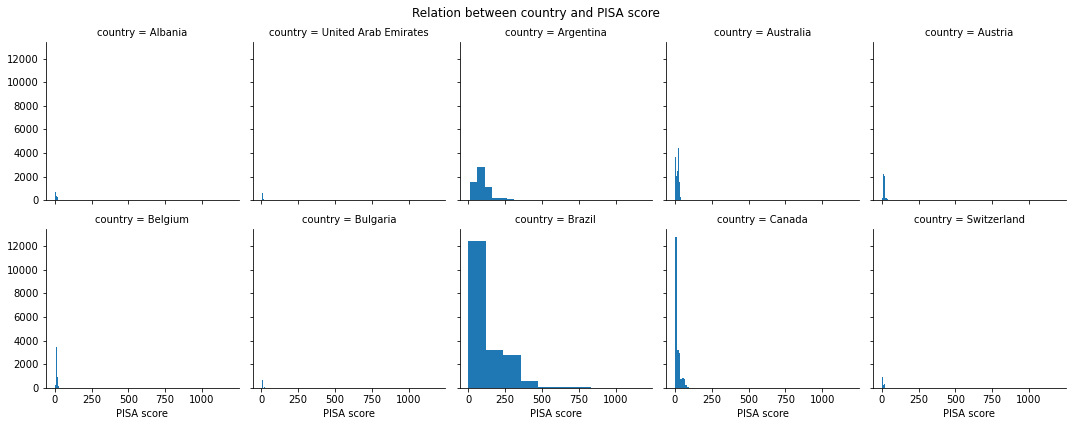

In [366]:
#relation between pisa score and country
g=sb.FacetGrid(data=pisa,col="country",col_wrap=5);
g.map(plt.hist,"pisa_score");

g.set_axis_labels("PISA score");
g.fig.subplots_adjust(top=0.9) 
g.fig.suptitle('Relation between country and PISA score');


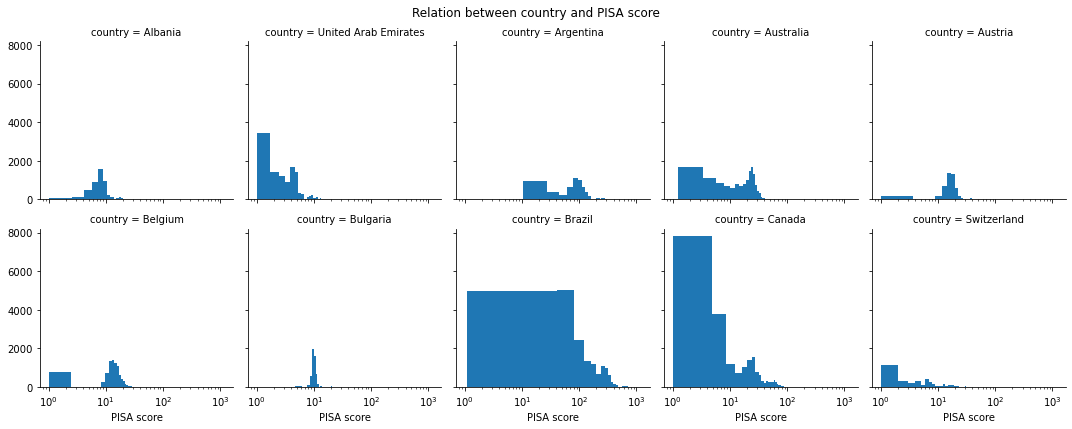

In [367]:
g=sb.FacetGrid(data=pisa,col="country",col_wrap=5);
g.map(plt.hist,"pisa_score",bins=30);
plt.xscale("log")
g.set_axis_labels("PISA score");
g.fig.subplots_adjust(top=0.9) 
g.fig.suptitle('Relation between country and PISA score');


>after scalling to log scale in both x axis most of students score distribution are bimodal and the other is right skewed and there're countries with highest score are Argentina and Brazil

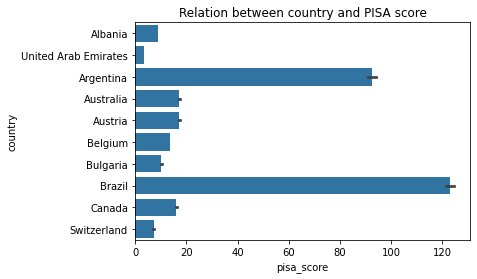

In [395]:
#other graph for relation between country and pisa score
sb.barplot(data = pisa, x = 'pisa_score', y = 'country',color=colors);
plt.title("Relation between country and PISA score");

>here it's obvious that Brazil and Argentina have the highest PISA score  

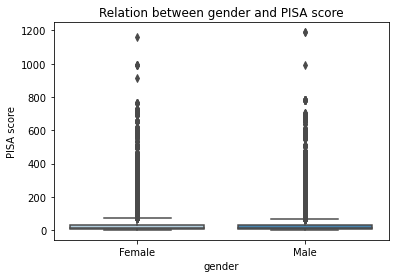

In [392]:
# plot gender vs pisa score
sb.boxplot(data = pisa, y = 'pisa_score', x = 'gender', palette = 'Blues')
plt.title("Relation between gender and PISA score");
plt.ylabel("PISA score")
plt.show()

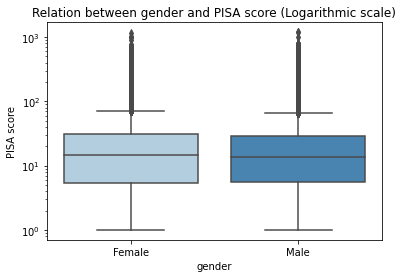

In [393]:
sb.boxplot(data = pisa, y = 'pisa_score', x = 'gender', palette = 'Blues')
plt.yscale("log")
plt.ylabel("PISA score")
plt.title("Relation between gender and PISA score (Logarithmic scale)");
plt.show()


>after taking log scale of y axis that shows that female and male are equally scored in PISA 

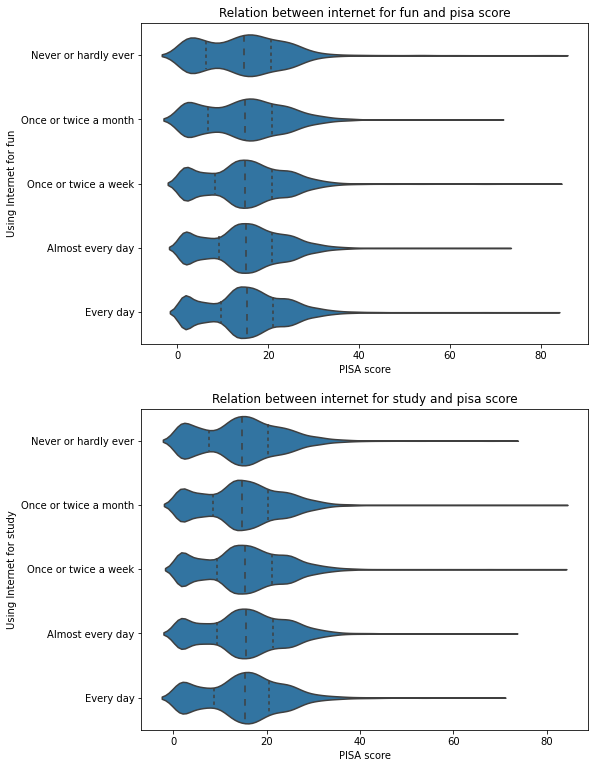

In [388]:
#plot relation between using internet and PISA score
fig, ax = plt.subplots(nrows=2, figsize = [8,13])
sb.violinplot(data=pisa,y="internet_fun",x="pisa_score",color=colors,ax=ax[0],inner="quartile");
xlabel="PISA score";
sb.violinplot(data=pisa,y="internet_study",x="pisa_score",color=colors,ax=ax[1],inner="quartile");
ax[0].set(xlabel=xlabel,ylabel="Using Internet for fun",title="Relation between internet for fun and pisa score");
ax[1].set(xlabel=xlabel,ylabel="Using Internet for study",title="Relation between internet for study and pisa score");

>surprisingly using internet for fun everyday doesn't have a bad effect on PISA score and aslo using internet for study doesn't have a significant effect on pisa score

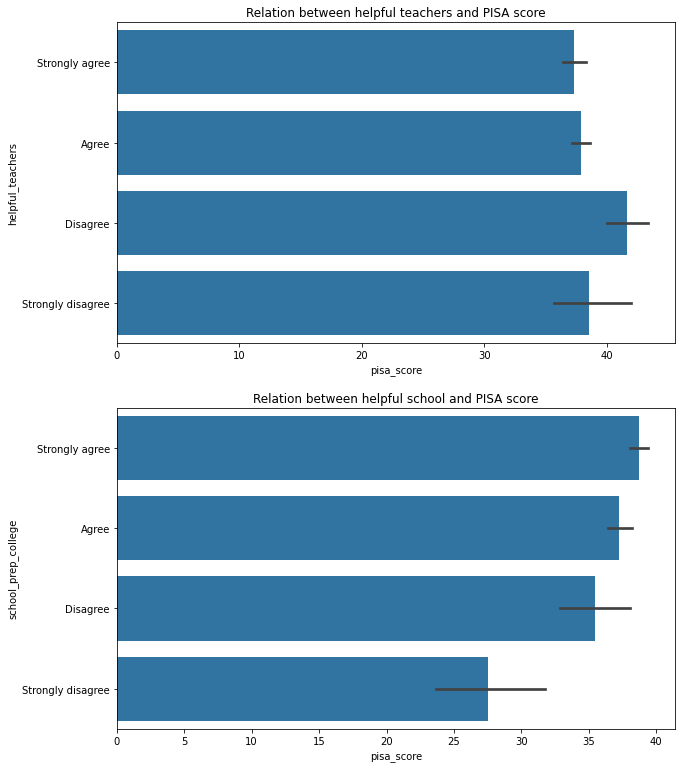

In [387]:
#find relation between pisa score and helpful_teachers ans school prepare
fig, ax = plt.subplots(nrows=2, figsize = [10,13])
sb.barplot(data=pisa,y="helpful_teachers",x="pisa_score",color=colors,ax=ax[0]);
sb.barplot(data=pisa,y="school_prep_college",x="pisa_score",color=colors,ax=ax[1]);
ax[0].set_title("Relation between helpful teachers and PISA score");
ax[1].set_title("Relation between helpful school and PISA score");

>students with highest PISA score claims that teachers aren't helpful enough but the school prepares them for college

#### Second let's invistigate gender and its relation with other indicators

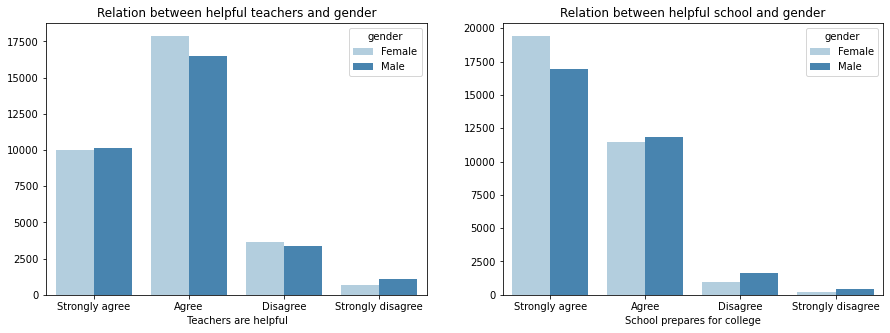

In [384]:
#plot the relation between gender and helpful teachers and school prepare for college
fig, ax = plt.subplots(ncols=2, figsize = [15,5])
sb.countplot(data = pisa, x = pisa.helpful_teachers, hue = pisa.gender, palette = 'Blues',ax=ax[0]);
sb.countplot(data = pisa, x = pisa.school_prep_college, hue = pisa.gender, palette = 'Blues',ax=ax[1]);
ax[0].set(xlabel=" Teachers are helpful",ylabel="",title="Relation between helpful teachers and gender");
ax[1].set(xlabel="School prepares for college",ylabel="",title="Relation between helpful school and gender");

>these two charts shows that females get more help and prepare from school than males

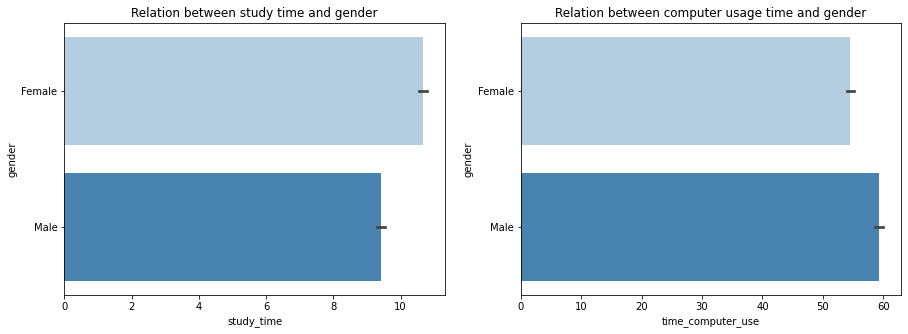

In [383]:
#relation between gender and study time
fig, ax = plt.subplots(ncols=2, figsize = [15,5])
sb.barplot(data = pisa, x = pisa.study_time, y = pisa.gender, palette = 'Blues',ax=ax[0]);
sb.barplot(data = pisa, x = pisa.time_computer_use, y = pisa.gender, palette = 'Blues',ax=ax[1]);
ax[0].set_title("Relation between study time and gender");
ax[1].set_title("Relation between computer usage time and gender");

>females have longer study time than males but males have longer time using computer

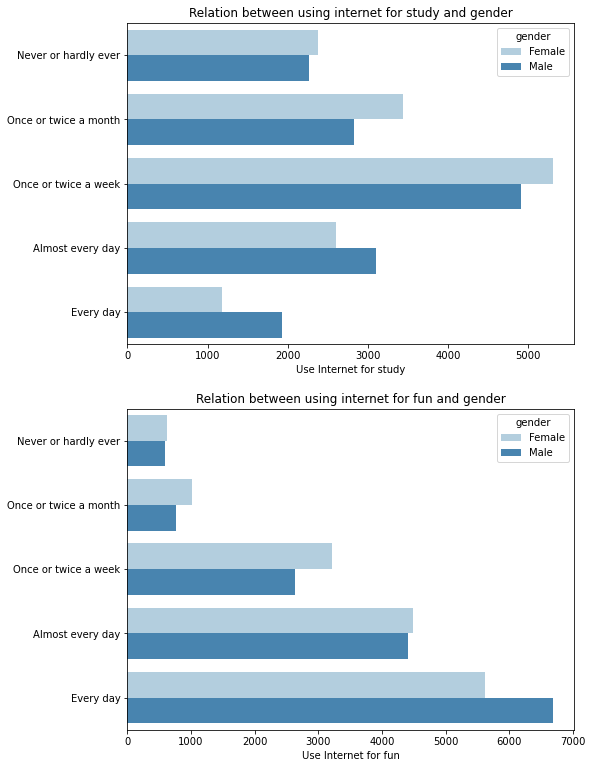

In [381]:
#show relation between gender and using internet
fig, ax = plt.subplots(nrows=2, figsize = [8,13])
sb.countplot(data = pisa, y = pisa.internet_study, hue = pisa.gender, palette = 'Blues',ax=ax[0]);
sb.countplot(data = pisa, y = pisa.internet_fun, hue = pisa.gender, palette = 'Blues',ax=ax[1]);
ax[0].set(xlabel="Use Internet for study",ylabel="",title="Relation between using internet for study and gender")

ax[1].set(xlabel="Use Internet for fun",ylabel="",title="Relation between using internet for fun and gender");

>These two charts also clears that males are using internet for fun more than females  
>about study time :males who use computer eveyday or almost evey day are larger than females but in less usage famales are largers

#### Third Let's invisitgate using internet indicators

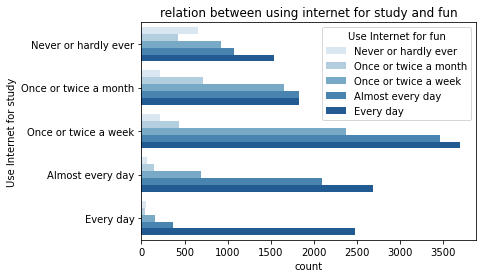

In [378]:
#show relation between internet users
sb.countplot(data = pisa, y = pisa.internet_study, hue = pisa.internet_fun, palette = 'Blues');
plt.legend(title="Use Internet for fun");
plt.ylabel("Use Internet for study");
plt.title("relation between using internet for study and fun");

>That chart shows that most of users of Internet in study use it for fun too and the most percentage of internet users use it for fun eveyday

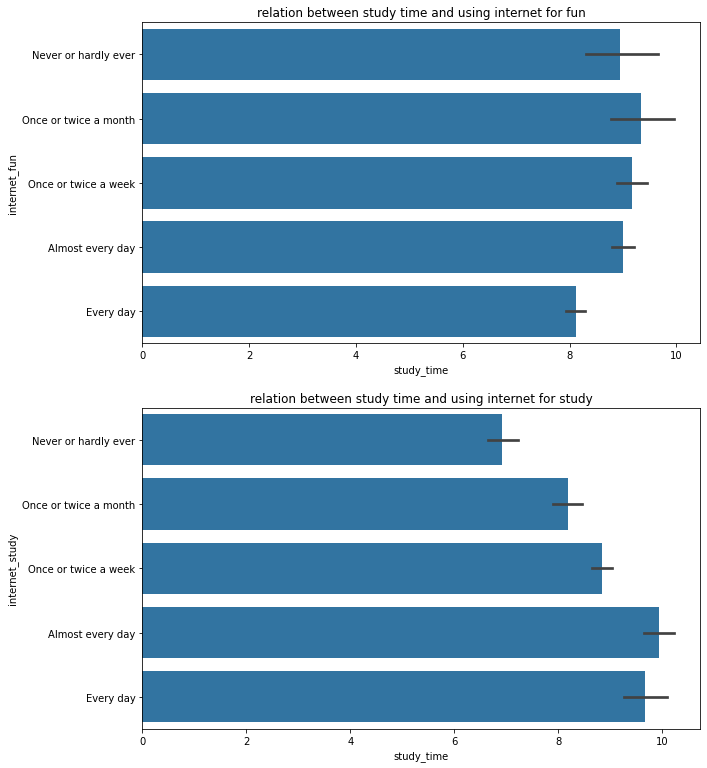

In [376]:
#find relation between study time and using internet for fun and for study
fig, ax = plt.subplots(nrows=2, figsize = [10,13])
sb.barplot(data=pisa,y="internet_fun",x="study_time",color=colors,ax=ax[0]);
sb.barplot(data=pisa,y="internet_study",x="study_time",color=colors,ax=ax[1]);
ax[0].set_title("relation between study time and using internet for fun");
ax[1].set_title("relation between study time and using internet for study");

>who use internet for fun everyday have the least study time.  
>In addition to that who have longer study time are who use internet for study every day or almost evey day

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> -Being in specific country has the most effect on PISA score: Brazil and Argantia have the highest PISA scores    
> -There's gender equality in most countries in pisa scoring.   
> -students who use internet for fun everyday have the least study time.  

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> -yes, I noticed that using internet for study and for fun surprisingly don't have a signifigant effect on students score but they together shows that users of internet for studying most of them use the internet for fun too and the percentage of using it for fun everyday is bigger than using it for studying only and this explains why using internet for study and fun don't have a significant effect in PISA score neither negatively nor positively.  
> -also I found that females are getting help from teacher and school more than males.   
> -I've found out that students with highest PISA score claims that teachers aren't helpful enough but the school prepares them for college.  
> -Females have longer study time than males but males have longer time using computer.  
> -Males are using internet for fun more than females  

## Multivariate Exploration


In [337]:
#let's invistigate scores above the mean
mean_score=pisa.pisa_score.mean()
high_pisa_scored=pisa.query('pisa_score > %s' %mean_score)


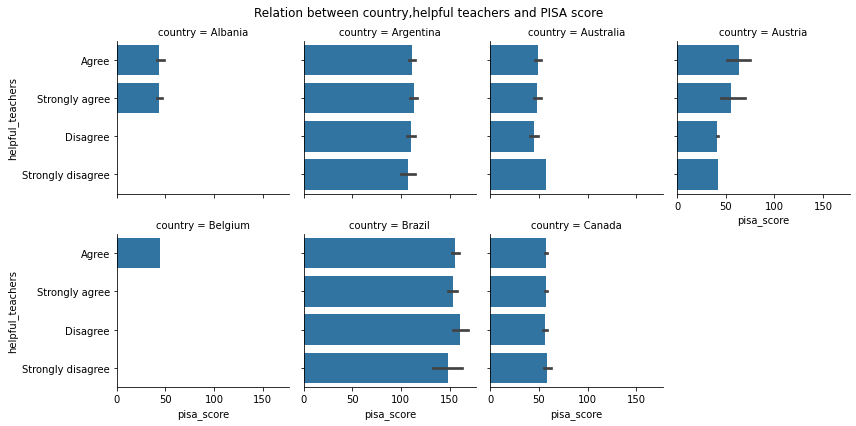

In [368]:
#find relation between helpful teachers,above mean pisa score and country
g=sb.FacetGrid(data=high_pisa_scored,col="country",col_wrap=4)
g.map(sb.barplot,'pisa_score','helpful_teachers',order=pisa.helpful_teachers.dropna().unique());
g.fig.subplots_adjust(top=0.9) 
g.fig.suptitle('Relation between country,helpful teachers and PISA score');

>Helpful teachers indicator are high in Blegium and Albania then comes Austria  
>Responds to helpful teachers are approximately equal in other countries

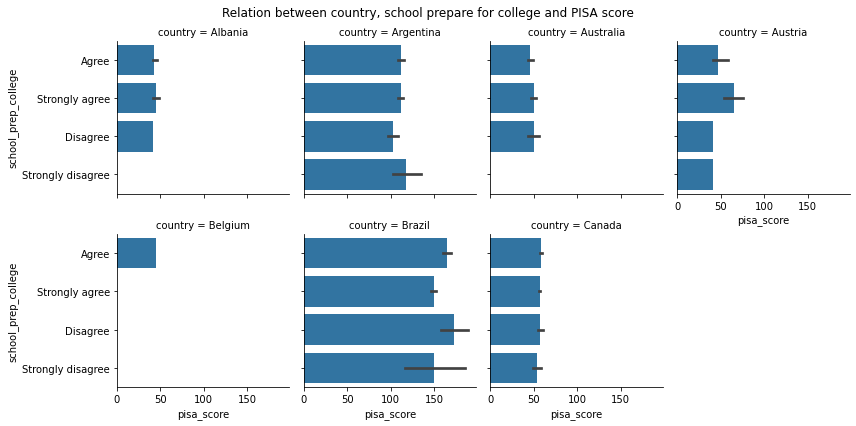

In [369]:
#find relation between helpful schools,above mean pisa score and country
g=sb.FacetGrid(data=high_pisa_scored,col="country",col_wrap=4)
g.map(sb.barplot,'pisa_score','school_prep_college',order=pisa.helpful_teachers.dropna().unique());
g.fig.subplots_adjust(top=0.9) 
g.fig.suptitle('Relation between country, school prepare for college and PISA score');

>Also in Belgium ,school prepares for college well then comes Albania

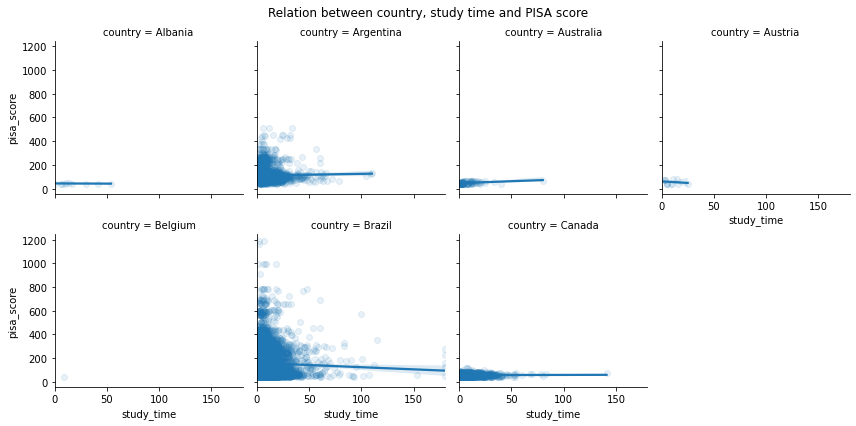

In [370]:
#relation between country study time and above mean pisa score
g=sb.FacetGrid(data=high_pisa_scored,col="country",col_wrap=4);
g.map(sb.regplot,"study_time","pisa_score",scatter_kws={'alpha':.1});
g.fig.subplots_adjust(top=0.9) 
g.fig.suptitle('Relation between country, study time and PISA score');

>from these charts:I found out that study time increase doesn't affect PISA score in most countries,a weak correlation

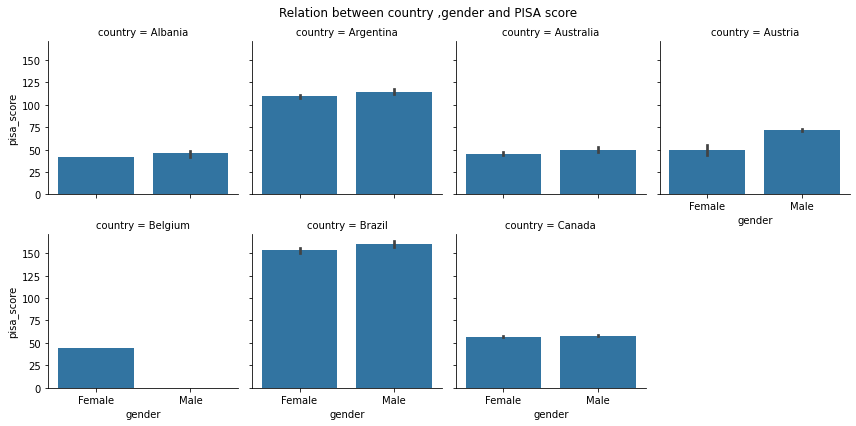

In [371]:
#relation between country,above mean pisa score, gender
g=sb.FacetGrid(data=high_pisa_scored,col='country',col_wrap=4)
g.map(sb.barplot,'gender','pisa_score',order=pisa.gender.unique());
g.fig.subplots_adjust(top=0.9) 
g.fig.suptitle('Relation between country ,gender and PISA score');

>Male have scored higher than females in Austria   
>In Belgium Females only who got scores higher from mean score.    
>In the rest countries there aren't a significant difference between females and males in score but males are a little bigger than females 

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> Helpful teachers indicator are high in Blegium and Albania then comes Austria  
> Also in Belgium:school prepares for college well then comes Albania  

### Were there any interesting or surprising interactions between features?

>-Yes, Brazil and Argantina where there're the highest PISA score, don't have a high indicators neither in helpful teachers nor school help for college. which means that the high scores result mainly from student efforts  
>-I found out that study time increase doesn't affect PISA score in most countries    
>-Male have scored higher than females in Austria  
>-In Belgium Females only who got scores higher from mean score.